<a href="https://colab.research.google.com/github/juancamilomartinezenriquez/Electromedicine/blob/main/obesidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv('fat.csv')
dataset.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [78]:
X = dataset.iloc[:, [ 1, 2, 3, 5, 6, 7, 8, 10, 11,  13, 14, 15, 16, 17, 18, 19, 20, 21]].values
X


array([[67, 'Male', 208, ..., 286, 0, 6],
       [21, 'Male', 389, ..., 235, 1, 7],
       [21, 'Female', 324, ..., 587, 4, 4],
       ...,
       [47, 'Male', 250, ..., 527, 4, 4],
       [36, 'Male', 178, ..., 114, 2, 8],
       [25, 'Female', 356, ..., 180, 7, 4]], dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X1 = LabelEncoder()
X[:,1] = labelencoder_X1.fit_transform(X[:,1])

In [82]:
y = dataset.iloc[:, 9].values
y


array([0, 1, 0, ..., 1, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)


In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

clf = Sequential()

#primera capa
clf.add(Dense(units = 80,kernel_initializer = "uniform", activation = "relu", input_dim = 18))
clf.add(Dropout(rate=0.1))

#segunda capa
clf.add(Dense(units = 80,kernel_initializer = "uniform", activation = "relu"))
clf.add(Dropout(rate=0.1))



#capa salida
clf.add(Dense(units = 1,kernel_initializer = "uniform", activation = "sigmoid"))

#compilador de la RNA
clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

clf.fit(X_train, Y_train, batch_size = 10, epochs = 100)


Epoch 1/100
701/701 [==============================] - 2s 2ms/step - loss: 0.6935 - accuracy: 0.4842
Epoch 2/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5070
Epoch 3/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5174
Epoch 4/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5244
Epoch 5/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5344
Epoch 6/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5398
Epoch 7/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5461
Epoch 8/100
701/701 [==============================] - 2s 3ms/step - loss: 0.6835 - accuracy: 0.5581
Epoch 9/100
701/701 [==============================] - 2s 2ms/step - loss: 0.6802 - accuracy: 0.5601
Epoch 10/100
701/701 [==============================] - 1s 2ms/step - loss: 0.6784 - accura

In [106]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [107]:
#predecir
y_pred = clf.predict(X_test)
y_pred

y_pred = (y_pred>0.5)
y_pred


55/55 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [108]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print((cm[0][0]+cm[1][1])/cm.sum())


0.5077010838562465


Confusion matrix, without normalization
[[427 452]
 [411 463]]


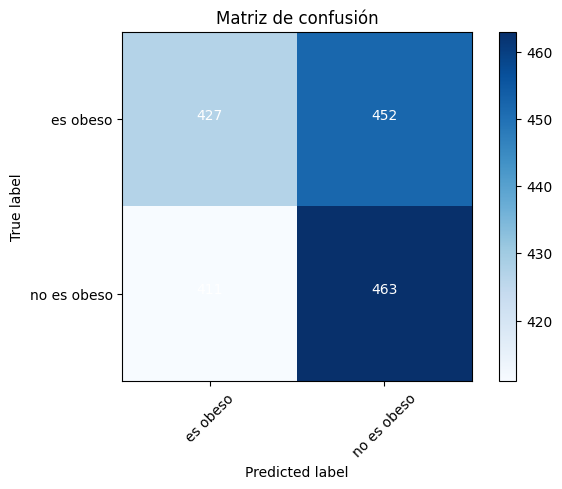

In [109]:
plot_confusion_matrix(cm, ['es obeso','no es obeso'],title='Matriz de confusión')